In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
df = pd.read_csv('store.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploring data set

#### Should rename columns for easier use in the code 
#### postal code is a useless information I guess 
add a paragraph to explain the data you have 
rename sub category column with a lower dash 

In [3]:
df.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [4]:
df.Category.value_counts()
# can plot bivariate graph between segment and what they buy 

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
df.Country.value_counts()
# we can drop this column because this data is only for the usa so this column does not add helpful information

United States    9994
Name: Country, dtype: int64

In [6]:
df.City.value_counts().head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

In [7]:
df.columns 

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.Sales.value_counts()
# can see most succesful products, regions, city, segment
# compare it to most profitable products, regions, city, segment to know which has more costs so it leads to less profit 
# can compare it with discount too to see whether it is affection profitability and sales volume or not 
# determine most demanded quatiities in terms of product segments, sales, profit ...

12.960     56
19.440     39
15.552     39
25.920     36
10.368     36
           ..
4.240       1
319.960     1
646.740     1
81.940      1
243.160     1
Name: Sales, Length: 5825, dtype: int64

In [9]:
df.Discount.value_counts()
#.sort_values()
# he is ordering the values by the count not by the percentage 

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

In [10]:
df.Region.value_counts()


West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [11]:
df.info()
# we don't have an issue with the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [12]:
df.describe()
# we have a negative profit is it an outlier?

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
index=0
for i in df.Profit:
    if i <-1000:
        print(i , index)
    index+=1
#there are some stores which are making a big loss
# badel el code bel query 

-1665.0522 27
-1359.992 165
-3839.9904 683
-1850.9464 1199
-1049.3406 1803
-1811.0784 2697
-1143.891 2846
-1306.5504 2928
-3399.98 3011
-2639.9912 3151
-1480.0335 3324
-1065.372 4355
-1181.2824 4820
-2929.4845 4991
-2287.782 5310
-1002.7836 5320
-1031.5385 6048
-6599.978 7772
-1237.8462 7898
-1141.47 8640
-1862.3124 9639
-3701.8928 9774


In [14]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
index=0
for i in df.duplicated():
    if i ==True:
        print(i, index)
    index+=1
#df.query[df.duplicated()==True]
# is it that someone buys product multiple times?

True 950
True 3406
True 3670
True 4117
True 4553
True 5905
True 6146
True 6334
True 6357
True 7608
True 7735
True 7759
True 8032
True 8095
True 9262
True 9363
True 9477


### Conclusion 
Should rename columns for easier use in the code 
rename sub category column with a lower dash 
Drop postal code column
Drop duplicants ?

# Data  Wrangeling

## Define 
Renaming columns to lower case names and replacing "-" with "_"

## Code 

In [16]:
df.rename(str.lower, axis='columns', inplace=True)

In [17]:
df.rename(columns={"sub-category": "sub_category"}, inplace=True)

In [18]:
df.columns = df.columns.str.replace(' ', '_')

## Test

In [19]:
df.columns

Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

## Define 
Drop 'postal code' and country column

## Code 

In [20]:
df.drop('postal_code', inplace=True, axis=1)

In [21]:
df.drop('country', inplace=True, axis=1)

## Test 

In [22]:
df.columns

Index(['ship_mode', 'segment', 'city', 'state', 'region', 'category',
       'sub_category', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

# Exploratory Data Analysis 

## Univariate exploration

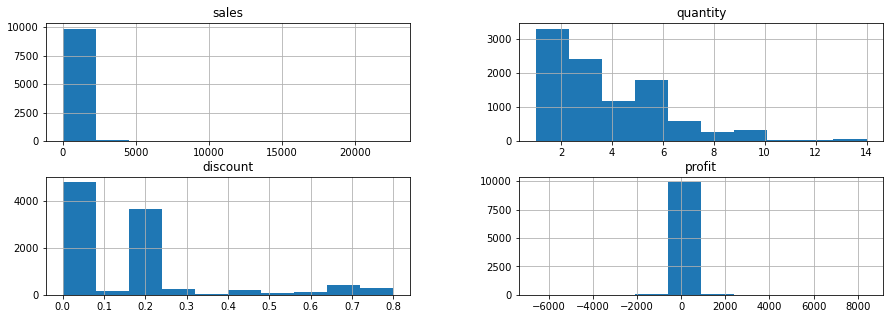

In [23]:
# Let's see the size of our segment, country, city
df.hist(figsize = (15,5));

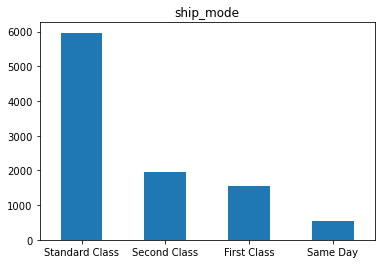

In [24]:
# the most popular ship mode 
var = df.ship_mode.value_counts()
var.plot(kind='bar',rot=0, subplots=True);
plt.show();

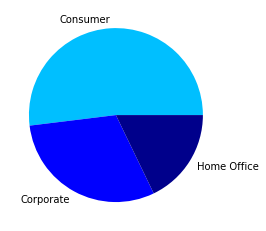

In [25]:
#plotting the percentage of female and male from the whole population
segment = df.segment.value_counts()
plt.pie(segment,labels = ['Consumer', 'Corporate',"Home Office"], colors=['deepskyblue',"blue",'darkblue'], )
# plot title
#plt.title('The percentage of female and male from the whole population', fontweight="bold")
# showing the plot
plt.show();

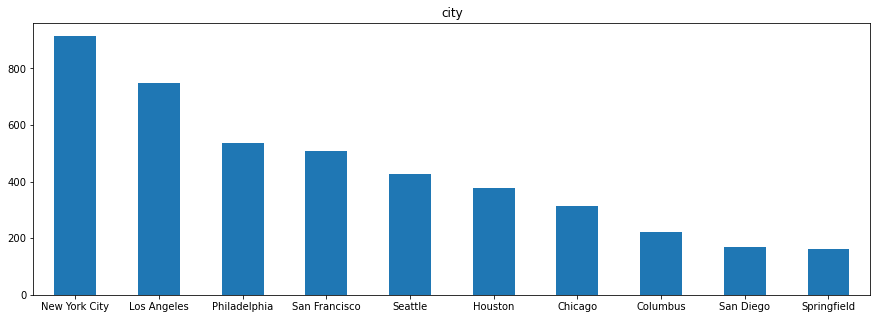

In [26]:
# can use query sales > 10
plt.figure(figsize = [15, 5]) 
sales = df.city.value_counts().head(10)
sales.plot(kind='bar',rot=0, subplots=True);
plt.show();

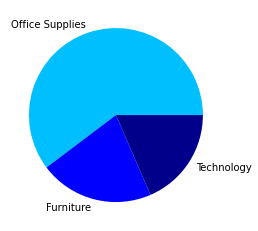

In [27]:
#most sold products
products = df.category.value_counts()
#plotting the percentage of female and male from the whole population
segment = df.segment.value_counts()
plt.pie(products,labels = ['Office Supplies', 'Furniture',"Technology"], colors=['deepskyblue',"blue",'darkblue'], )
# plot title
#plt.title('The percentage of female and male from the whole population', fontweight="bold")
# showing the plot
plt.show();

In [28]:
# can do a map graph with the state and circles number of sales 

In [29]:
df.sub_category.value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: sub_category, dtype: int64

# Bivariate exploration

In [30]:
df.columns

Index(['ship_mode', 'segment', 'city', 'state', 'region', 'category',
       'sub_category', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [31]:
# which category is more profitable
# for that I will add a column unit sales 
unit_sales= df.sales/df.quantity
df["unit_sales"]=unit_sales

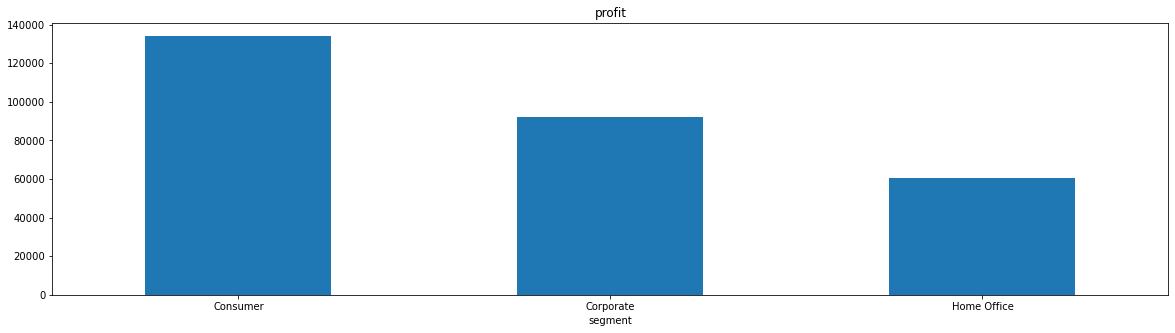

In [32]:
#most profitable segment
sales_per_segment = df.groupby("segment")['profit'].sum()
plt.figure(figsize = [20, 5]) 

sales_per_segment.plot(kind='bar',rot=0, subplots=True);
plt.show();

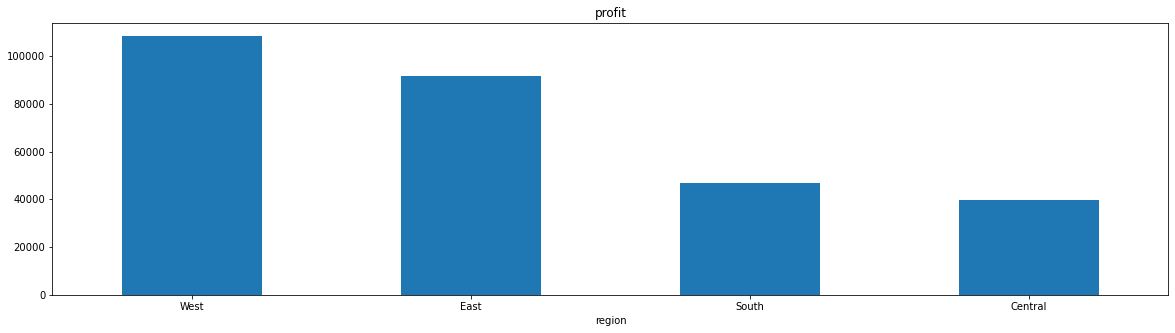

In [33]:
#most profitable city
sales_per_segment = df.groupby("region")['profit'].sum().sort_values(ascending=False )
plt.figure(figsize = [20, 5]) 

sales_per_segment.plot(kind='bar',rot=0, subplots=True);
plt.show();

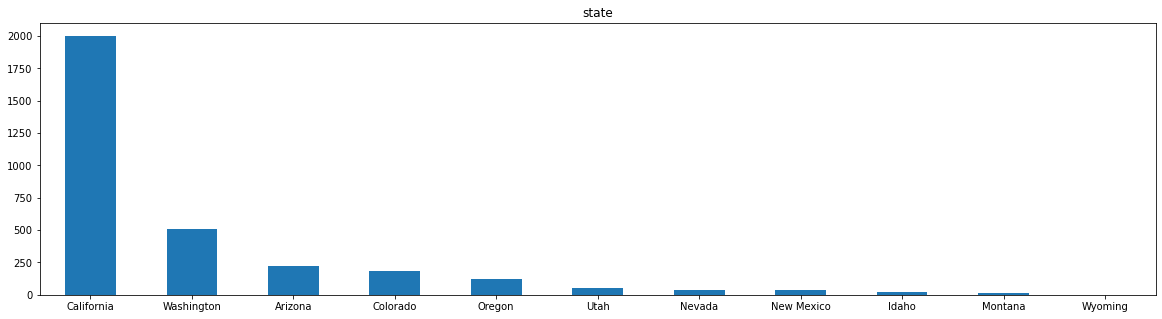

In [34]:
#investigating which city in the west is more profitable 
west = df.query('region== "West"')
city_count = west.state.value_counts()
plt.figure(figsize = [20, 5]) 

city_count.plot(kind='bar',rot=0, subplots=True);
plt.show();


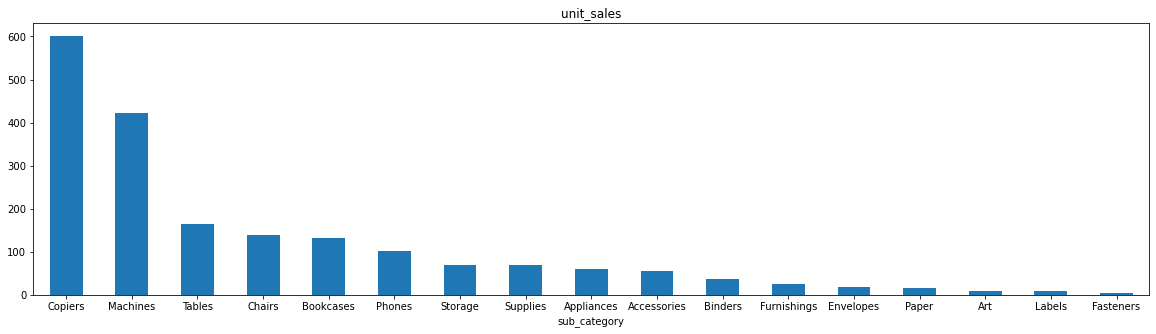

In [35]:
sales_per_category = df.groupby("sub_category")['unit_sales'].mean().sort_values(ascending=False )
plt.figure(figsize = [20, 5]) 

sales_per_category.plot(kind='bar',rot=0, subplots=True);
plt.show();

copiers with highest has less ros than labels papers and envelop and machines 2nd highest sales has negative ros 

In [36]:
# computing return on sales
ros = (df.profit/df.sales)*100
df["ros"]=ros

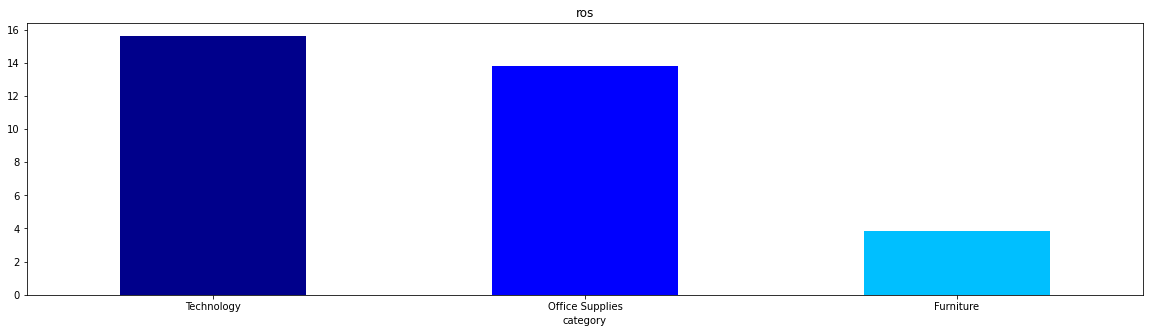

In [37]:
# retrun on sales by sub_category 
ros = df.groupby("category")['ros'].mean().sort_values(ascending=False )
plt.figure(figsize = [20, 5]) 

ros.plot(kind='bar',rot=0, subplots=True,color=["darkblue","blue","deepskyblue"]);
plt.show();


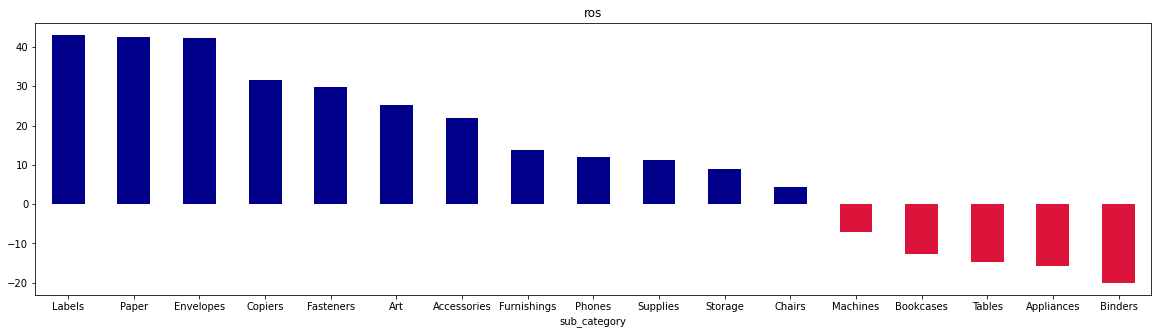

In [38]:
# retrun on sales by sub_category 
ros = df.groupby("sub_category")['ros'].mean().sort_values(ascending=False )
plt.figure(figsize = [20, 5]) 
mask = ros <0

colors = np.array(['darkblue']*len(ros))
colors[mask.values] = 'crimson'
ros.plot(kind='bar',rot=0, subplots=True, color=colors);
plt.show();


In [39]:
all_ros = df.groupby("category")['sub_category'].value_counts()

In [40]:
df1 = df.query("ros<0")
negative_ros = df1.groupby("category")['sub_category'].value_counts()

In [41]:
#positive_ros 
all_ros-negative_ros

category         sub_category
Furniture        Bookcases       119.0
                 Chairs          382.0
                 Furnishings     790.0
                 Tables          116.0
Office Supplies  Appliances      399.0
                 Art               NaN
                 Binders         910.0
                 Envelopes         NaN
                 Fasteners       205.0
                 Labels            NaN
                 Paper             NaN
                 Storage         685.0
                 Supplies        157.0
Technology       Accessories     684.0
                 Copiers           NaN
                 Machines         71.0
                 Phones          753.0
Name: sub_category, dtype: float64

Technology equipements have highest mean of ROS but in each sub category we have items with negative ros except for copiers, labels, envelops, art, paper 


In [42]:
def plot_sidebyside(col_name,x="ship_mode", axis_label="Number"):
    global df
    g = sns.catplot(x="ship_mode", col=col_name, 
                data= df,
                kind="count",col_wrap=4,palette =sns.color_palette(['deepskyblue', 'darkblue']))
    #setting axis label and xtick labels
    (g.set_axis_labels("", axis_label))
    #precising the bottom and the limit to have unifor plotting across many graphs
    return plt.show();

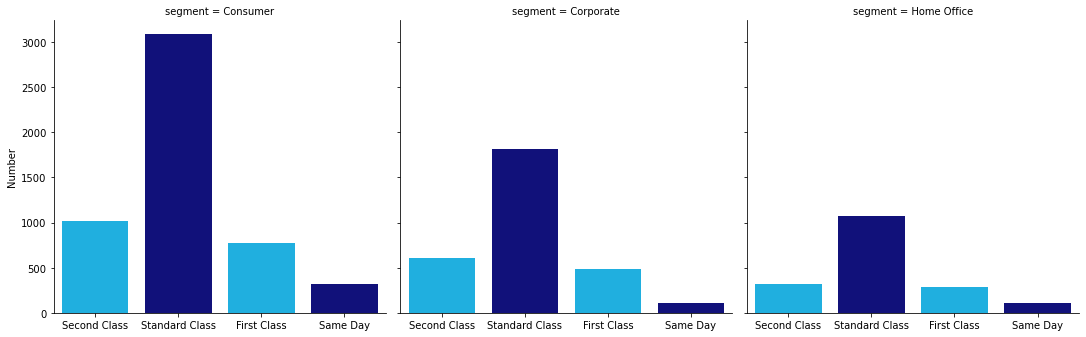

In [43]:
plot_sidebyside("segment")

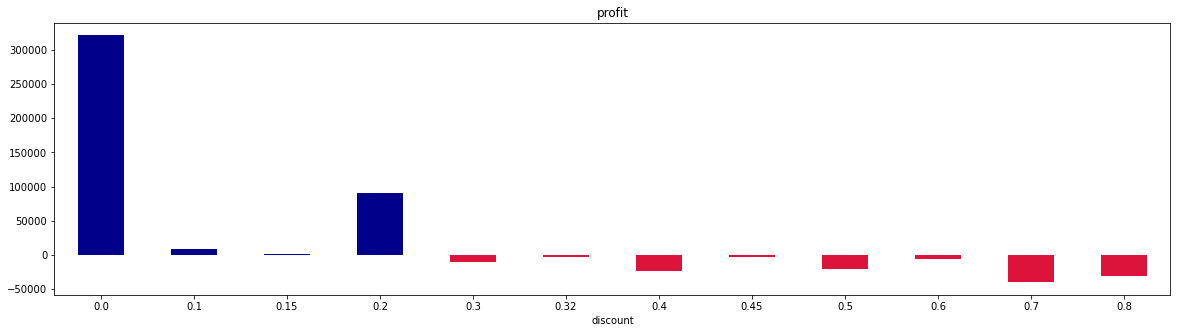

In [44]:
#profitablity compared to discount
discount = df.groupby("discount")["profit"].sum()
plt.figure(figsize = [20, 5]) 

mask = discount <0

colors = np.array(['darkblue']*len(discount))
colors[mask.values] = 'crimson'

discount.plot(kind='bar',rot=0, subplots=True, color = colors);
plt.show();

In [45]:
# which discounts will cause negative profit 
negative_discount = df.query('profit<0')
n_discount = negative_discount.groupby("sub_category")["discount"].value_counts()
n_discount

sub_category  discount
Accessories   0.20         91
Appliances    0.80         67
Binders       0.70        380
              0.80        233
Bookcases     0.32         27
              0.20         23
              0.50         18
              0.15         17
              0.70         15
              0.30          9
Chairs        0.30        148
              0.20         83
              0.10          4
Fasteners     0.20         12
Furnishings   0.60        138
              0.20         29
Machines      0.70         23
              0.50         12
              0.40          8
              0.30          1
Phones        0.40         97
              0.20         39
Storage       0.20        161
Supplies      0.20         33
Tables        0.40         75
              0.30         50
              0.50         36
              0.20         31
              0.45         11
Name: discount, dtype: int64

In [46]:
df.columns

Index(['ship_mode', 'segment', 'city', 'state', 'region', 'category',
       'sub_category', 'sales', 'quantity', 'discount', 'profit', 'unit_sales',
       'ros'],
      dtype='object')

### Problems :
discount allocation 
ros of some products is negative : need to compare costs and price allocation
more marketing to profitable segment consumer in west (california espacially)
copiers with highest has less ros than labels papers and envelop and machines 2nd highest sales has negative ros 
technology least sold quanitities but highest ros 